# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import seaborn as sns

In [2]:
#esto es para forzar a plt a poner fondos blancos en las figuras aunque el tema del notebook sea oscuro
#plt.rcParams['axes.facecolor'] = 'white'
#plt.rcParams['figure.facecolor'] = 'white'
cmap = plt.get_cmap("tab10")
pio.templates.default = "seaborn"

sns.set_style("darkgrid", rc={'xtick.bottom': True})

In [156]:
entropy_reports = "../../../reports/reports_nohubs/analisis_tfidf/entropy/"
infomap_entropy = pd.read_csv(entropy_reports+"entropy_infomap.csv")
louvain_entropy = pd.read_csv(entropy_reports+"entropy_louvain.csv")

infomap_random = pd.read_csv(entropy_reports+"random_entropy_data/entropias_random_infomap.csv").round(2)
louvain_random = pd.read_csv(entropy_reports+"random_entropy_data/entropias_random_louvain.csv").round(2)

# Grafico

In [165]:
def group_by_size(data_df,num_groups,max_log):
    df = data_df.copy()
    spacing = np.logspace(0,max_log,num=num_groups).round().astype(int)
    bins = np.digitize(df.tamaño.values, spacing)
    df["bins"] = bins
    
    mean_s = df.drop(columns="comunidad").groupby("bins").mean().round(2).rename(columns={old:str(old)+"_mean" for old in df.columns.values})
    std = df.drop(columns="comunidad").groupby("bins").std().round(2).rename(columns={old:str(old)+"_std" for old in df.columns.values}).fillna(0)

    result = pd.concat([mean_s,std], axis=1)
    return result

In [184]:
louvain_data = group_by_size(louvain_entropy,15,3)
infomap_data = group_by_size(infomap_entropy,15,2)

In [186]:
def get_s_vs_random(df_s,df_random,i):
    mean_s_col = f"entropia_{i}_mean"
    std_s_col = f"entropia_{i}_std"
    x1, y1, std1 = df_s.tamaño_mean.values, df_s[mean_s_col].values, df_s[std_s_col].values
    x2, y2, std2 = df_random["tamaño"].values, df_random[mean_s_col].values, df_random[std_s_col].values

    return (x1,y1,std1), (x2,y2,std2)

def plot_s_vs_random(infomap,infomap_random,louvain,louvain_random,i,fig_size):
    infomap_values = get_s_vs_random(infomap,infomap_random,i)
    louvain_values = get_s_vs_random(louvain,louvain_random,i)

    fig, axs = plt.subplots(1,2,figsize=fig_size,sharex=True,sharey=True)
    for ax, val in zip(axs, [infomap_values,louvain_values]):
        x1,y1,std1 = val[0]
        x2,y2,std2 = val[1]
        
        ax.scatter(x1 , y1, linewidths=0.3, c="b",linestyle='None', label="Mean entropy, clusters")
        ax.errorbar(x1, y1,std1, color='b',linestyle='None', alpha=0.2)

        ax.plot(x2 ,y2, "r--", label="Mean entropy, control sample")
        ax.fill_between(x2, y2 - std2, y2 + std2, color='r', alpha=0.2)

        ax.set_title("Infomap")
        ax.grid(True)
        ax.set_xlabel("Number of nodes")
        ax.set_ylabel("Specificity")
        ax.set_xscale("log")
        

        ax.legend()


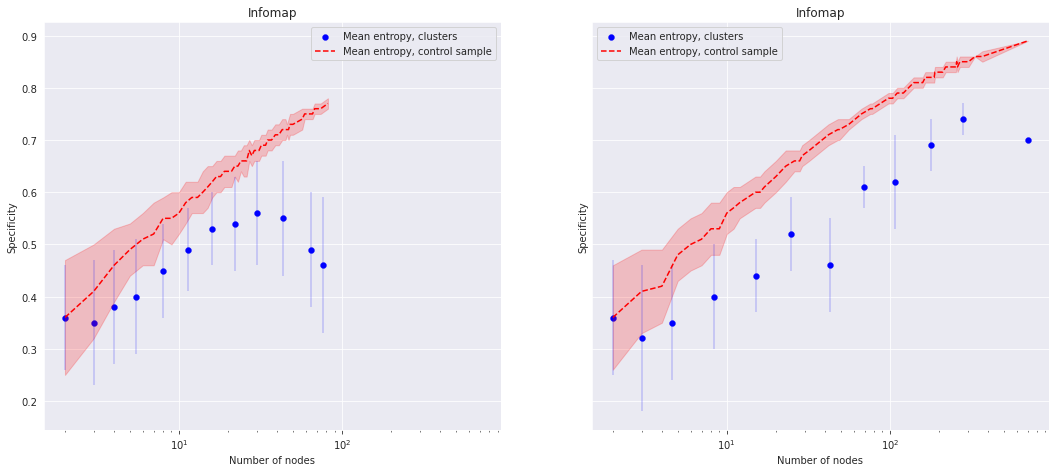

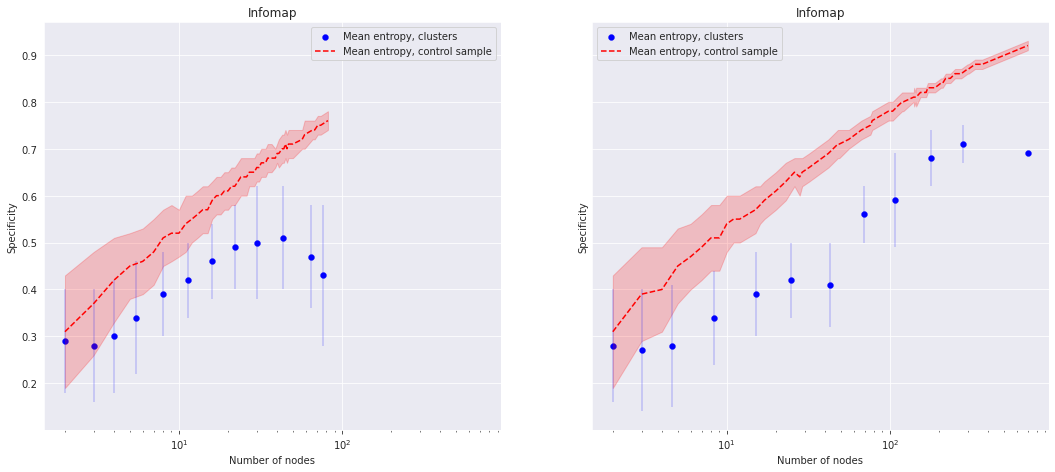

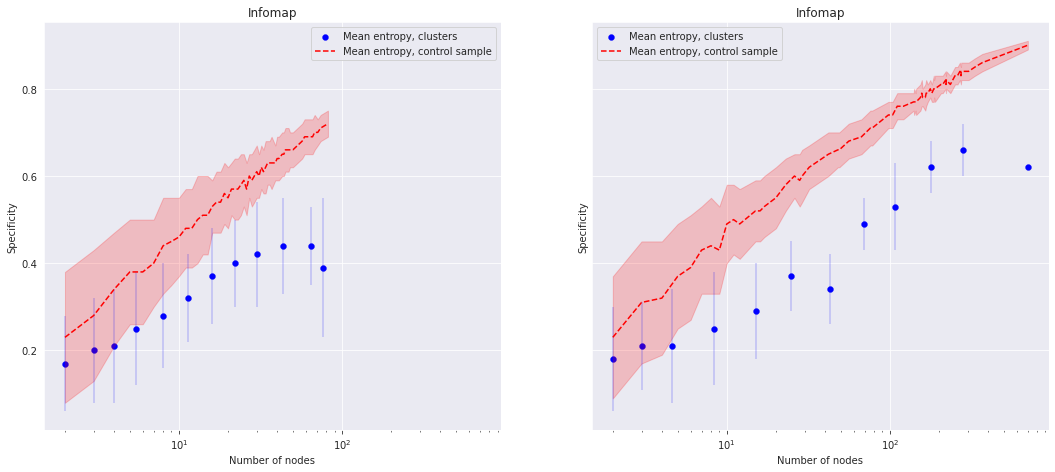

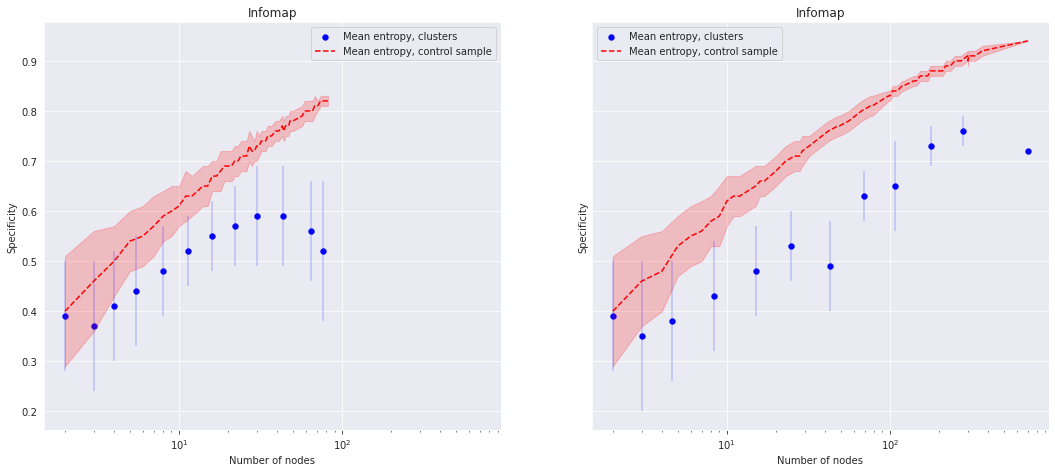

In [187]:
for i in range(4):
    plot_s_vs_random(infomap_data,infomap_random,louvain_data,louvain_random,i,(18,7.5))